You are a data scientist working for a medical research institution. You are tasked with predicting the progression of a chronic disease based on various patient characteristics and medical history. The dataset you are working with is large and complex, with potentially non-linear relationships between variables. You want to build a model that can accurately predict the disease progression to assist in early diagnosis and personalized treatment planning. You decide to explore linear and polynomial regression models to capture the underlying patterns in the data.

Q1. Import the necessary Python libraries for building, evaluating, and visualizing regression models for medical data analysis.

In [8]:
# Sol
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Q2. Design and generate a synthetic dataset that mirrors the complex relationships between patient characteristics and disease progression, reflecting realistic medical data.

In [9]:
# Generate synthetic data

np.random.seed(42)

X = 2 * np.random.rand(200, 1)

y = 1 + 2 * X + np.random.randn(200, 1)

Q3. Emphasize the critical role of separating the dataset to ensure the model's reliability and generalization to new, unseen patient data.

In [10]:
# Split the data into training and testing sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



Q4. Plot and compare the performance of the chosen models as training data size increases, employing metrics suitable for disease progression prediction.

In [28]:
# Function to plot the learning curves

def plot_learning_curves(model, X_train, y_train, X_val, y_val, poly_features=None):
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        X_train_m = X_train[:m]
        y_train_m = y_train[:m]

        if poly_features is not None:
            X_train_m = poly_features.transform(X_train_m)

        # The function takes a model as an argument and uses its fit and predict methods.
        # While the example doesn't explicitly define model as LinearRegression(),
        # this is the standard way to interact with scikit-learn models, and LinearRegression is a common choice for such plots.
        model.fit(X_train_m, y_train_m)
        y_train_pred = model.predict(X_train_m)
        y_val_pred = model.predict(X_val)

        # The errors are calculated using mean_squared_error, which directly computes the Mean Squared Error.
        train_errors.append(mean_squared_error(y_train_m, y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))

    # This is the key part. The code then takes the square root of the calculated train_errors and val_errors before plotting them.
    # Taking the square root of MSE converts it into RMSE.
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label= "Training Set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation Set")

    plt.legend(loc= "upper right", fontsize=10)
    plt.xlabel("Training set size", fontsize=12)
    plt.ylabel("RMSE", fontsize=12)
    plt.title("Learning Curves", fontsize=12)

Q5. Assess the adequacy of the linear model in capturing the intricate relationships between medical features and disease progression, and discuss any limitations due to its simplicity.

Text(0.5, 1.0, 'Linear Regression (Underfitting)')

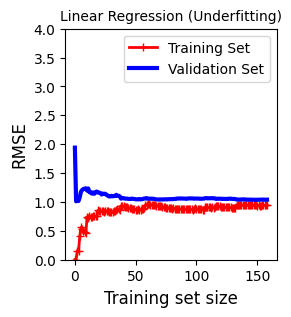

In [29]:
# Linear Regression (Underfitting)

lin_reg = LinearRegression()
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_learning_curves(lin_reg, X_train, y_train, X_val, y_val)
plt.ylim(0, 4)
plt.title("Linear Regression (Underfitting)", fontsize=10)

Q6. Evaluate if the higher-degree polynomial model leads to better predictions on the validation dataset, given the complex interactions between patient features. Assess potential challenges introduced by model complexity.

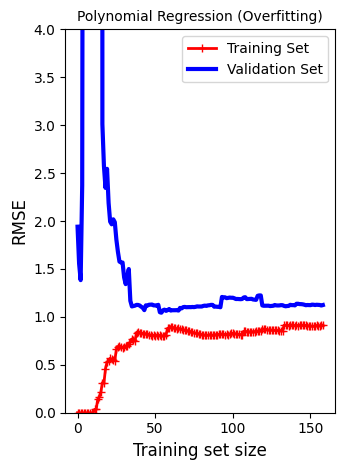

In [20]:
# Polynomial Regression (Overfitting)

plt.subplot(1, 2, 2)
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
plot_learning_curves(poly_reg, X_poly, y_train, poly_features.transform(X_val), y_val)
plt.ylim(0, 4)
plt.title("Polynomial Regression (Overfitting)", fontsize=10)
plt.tight_layout()
plt.show()

In [36]:
def plot_learning_curves_MSE(model, X_train, y_train, X_val, y_val, poly_features=None, label_prefix=""):
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        X_train_m = X_train[:m]
        y_train_m = y_train[:m]

        if poly_features is not None:
            X_train_m = poly_features.transform(X_train_m)

        # The function takes a model as an argument and uses its fit and predict methods.
        # While the example doesn't explicitly define model as LinearRegression(),
        # this is the standard way to interact with scikit-learn models, and LinearRegression is a common choice for such plots.
        model.fit(X_train_m, y_train_m)
        y_train_pred = model.predict(X_train_m)
        y_val_pred = model.predict(X_val)

        # The errors are calculated using mean_squared_error, which directly computes the Mean Squared Error.
        train_errors.append(mean_squared_error(y_train_m, y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))

    plt.plot(train_errors, "r-+", linewidth=2, label=f"{label_prefix} Training Set (MSE)")
    plt.plot(val_errors, "b-", linewidth=3, label=f"{label_prefix} Validation Set (MSE)")

    plt.legend(loc= "upper right", fontsize=10)
    plt.xlabel("Training set size", fontsize=12)
    plt.ylabel("MSE", fontsize=12)
    plt.title("Learning Curves", fontsize=12)

Text(0.5, 1.0, 'Linear Regression (Underfitting)')

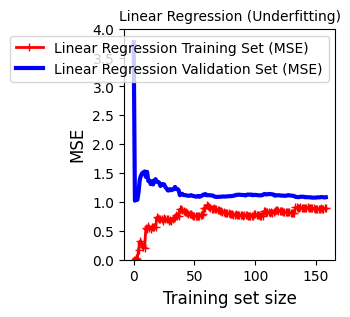

In [43]:
lin_reg = LinearRegression()
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_learning_curves_MSE(lin_reg, X_train, y_train, X_val, y_val, label_prefix="Linear Regression")
plt.ylim(0, 4)
plt.title("Linear Regression (Underfitting)", fontsize=10)

In [35]:
from sklearn.metrics import r2_score

In [49]:
def plot_learning_curves_RSquareScore(model, X_train, y_train, X_val, y_val, poly_features=None, label_prefix=""):
    train_r2_scores, val_r2_scores = [], []
    for m in range(1, len(X_train)):
        X_train_m = X_train[:m]
        y_train_m = y_train[:m]

        if poly_features is not None:
            X_train_m = poly_features.transform(X_train_m)

        # The function takes a model as an argument and uses its fit and predict methods.
        # While the example doesn't explicitly define model as LinearRegression(),
        # this is the standard way to interact with scikit-learn models, and LinearRegression is a common choice for such plots.
        model.fit(X_train_m, y_train_m)
        y_train_pred = model.predict(X_train_m)
        y_val_pred = model.predict(X_val)

        # The errors are calculated using mean_squared_error, which directly computes the Mean Squared Error.
        train_r2_scores.append(r2_score(y_train_m, y_train_pred))
        val_r2_scores.append(r2_score(y_val, y_val_pred))

    # This is the key part. The code then takes the square root of the calculated train_errors and val_errors before plotting them.
    # Taking the square root of MSE converts it into RMSE.
    plt.plot(range(1, len(X_train)), train_r2_scores, "r-+", linewidth=2, label=f"{label_prefix} Training Set (R²)")
    plt.plot(range(1, len(X_train)), val_r2_scores, "b-", linewidth=3, label=f"{label_prefix} Validation Set (R²)")


    plt.legend(loc= "upper right", fontsize=10)
    plt.xlabel("Training set size", fontsize=12)
    plt.ylabel("R² Score", fontsize=12)
    plt.title("Learning Curves", fontsize=12)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Text(0.5, 1.0, 'Linear Regression (Underfitting)')

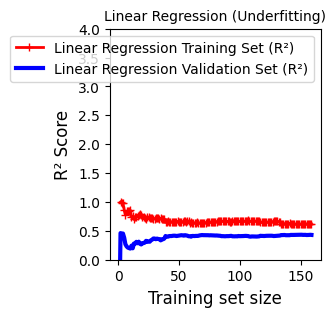

In [50]:
lin_reg = LinearRegression()
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_learning_curves_RSquareScore(lin_reg, X_train, y_train, X_val, y_val, label_prefix="Linear Regression")
plt.ylim(0, 4)
plt.title("Linear Regression (Underfitting)", fontsize=10)